In [98]:
import pandas as pd

In [99]:
data = pd.read_csv('data/revenue-data.csv')

In [100]:
data

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,32,314.06,30.14,0,Degree,Private sector,Male,London,60173.49
1,20,3758.36,149.36,4,GCSE,Private sector,Female,South East,42965.45
2,36,601.72,21.87,0,Masters,Private sector,Male,East of England,54924.41
3,21,44.89,182.80,9,Masters,Private sector,Female,Northern Ireland,26734.99
4,24,614.80,194.34,0,GCSE,Private sector,Male,Scotland,15325.23
...,...,...,...,...,...,...,...,...,...
995,56,177.67,272.87,5,GCSE,Public Sector,Female,North West,22306.84
996,54,155.42,231.17,5,Other,Private sector,Male,Wales,27704.97
997,22,2376.10,287.15,11,Other,Private sector,Male,South East,62542.89
998,49,4355.04,27.78,0,Degree,Private sector,Male,Northern Ireland,96745.84


In [102]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


data["Education"] = le.fit_transform(data['Education'])
data["WorkType"] = le.fit_transform(data["WorkType"])
data['Sex'] = le.fit_transform(data['Sex'])
data['Region'] =  le.fit_transform(data['Region'])
data

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,32,314.06,30.14,0,1,0,1,2,60173.49
1,20,3758.36,149.36,4,2,0,0,7,42965.45
2,36,601.72,21.87,0,3,0,1,1,54924.41
3,21,44.89,182.80,9,3,0,0,5,26734.99
4,24,614.80,194.34,0,2,0,1,6,15325.23
...,...,...,...,...,...,...,...,...,...
995,56,177.67,272.87,5,2,1,0,4,22306.84
996,54,155.42,231.17,5,5,0,1,9,27704.97
997,22,2376.10,287.15,11,5,0,1,7,62542.89
998,49,4355.04,27.78,0,1,0,1,5,96745.84


In [132]:
df = data.drop(columns= ["Salary"])
df = df.drop(columns= ["Age"])
df = df.drop(columns= ["Sex"])
df

,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Region
0,314.06,30.14,0,1,0,2
1,3758.36,149.36,4,2,0,7
2,601.72,21.87,0,3,0,1
3,44.89,182.80,9,3,0,5
4,614.80,194.34,0,2,0,6
...,...,...,...,...,...,...
995,177.67,272.87,5,2,1,4
996,155.42,231.17,5,5,0,9
997,2376.10,287.15,11,5,0,7
998,4355.04,27.78,0,1,0,5


In [114]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [115]:
dbscan = DBSCAN(eps = 1, min_samples = 8)

In [133]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [134]:
dbscan.fit(scaled_data)
label = dbscan.labels_
import numpy as np
np.unique(label)

array([-1,  0,  1,  2,  3], dtype=int64)

In [135]:
df["cluster_id"] = label
df.cluster_id.value_counts()

 0    552
-1    314
 1    118
 2      8
 3      8
Name: cluster_id, dtype: int64

In [136]:
df

,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Region,cluster_id
0,314.06,30.14,0,1,0,2,0
1,3758.36,149.36,4,2,0,7,-1
2,601.72,21.87,0,3,0,1,0
3,44.89,182.80,9,3,0,5,0
4,614.80,194.34,0,2,0,6,0
...,...,...,...,...,...,...,...
995,177.67,272.87,5,2,1,4,-1
996,155.42,231.17,5,5,0,9,0
997,2376.10,287.15,11,5,0,7,-1
998,4355.04,27.78,0,1,0,5,-1


In [137]:
df.pivot_table(columns=['cluster_id'], aggfunc='size')

cluster_id
-1    314
 0    552
 1    118
 2      8
 3      8
dtype: int64

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\syedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SiteSpending', ylabel='SiteTime'>

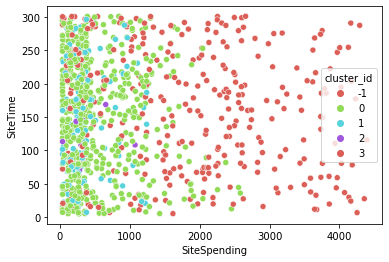

In [138]:
sns.scatterplot( df.SiteSpending, df.SiteTime, hue = df.cluster_id, palette="hls")

C:\Users\syedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SiteSpending', ylabel='SiteTime'>

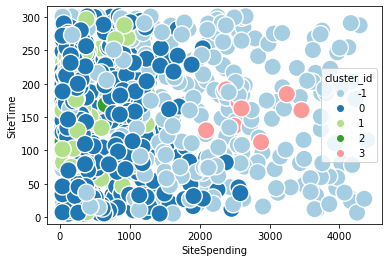

In [139]:
sns.scatterplot(df.SiteSpending, df.SiteTime, hue = df.cluster_id, palette="Paired", s = 300)

In [140]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

cluster = []
inertia = []

for i in range(1, 8):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df.drop(columns = ["Region"]))
  inertia.append(kmeans.inertia_)
  cluster.append(i)

C:\Users\syedi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


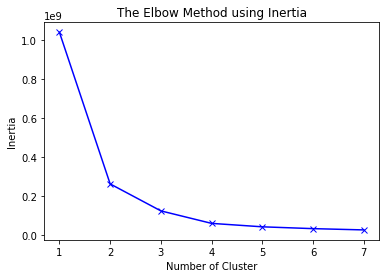

In [141]:
plt.plot(cluster, inertia,  'bx-')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [142]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df.drop(columns='Region'))
labels = kmeans.labels_
df["labels"] = labels

In [144]:
df.head()

,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Region,cluster_id,labels
0,314.06,30.14,0,1,0,2,0,2
1,3758.36,149.36,4,2,0,7,-1,1
2,601.72,21.87,0,3,0,1,0,2
3,44.89,182.80,9,3,0,5,0,2
4,614.80,194.34,0,2,0,6,0,2


<AxesSubplot:xlabel='SiteSpending', ylabel='SiteTime'>

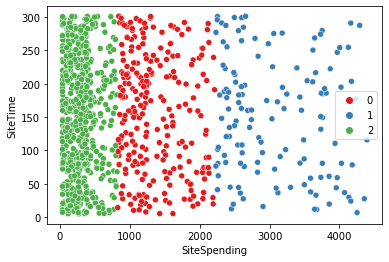

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'SiteSpending', y = 'SiteTime' , hue = kmeans.labels_ ,data = df, palette = 'Set1')

In [66]:
!pip install pycountry-convert

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=de2186277f50d93eb9fbbd974dc529914d246b3bb89ca533558be387f8e112ed
  Stored in directory: c:\users\syedi\appdata\local\pip\cache\wheels\47\15\92\e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry


In [147]:
from pycountry_convert import country_name_to_country_alpha2

In [148]:
def get_code(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'UNK' 
    return cn_a2_code

In [149]:
df["region_code"] = df.Region.apply(get_code)

In [150]:
df.region_code.isnull().any()

False

In [151]:
!pip install geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="irfansyed479@gmail.com")
def geolocate_lat(col):
    try:
        loc = geolocator.geocode(col)
        return loc.latitude
    except:
      return np.nan

def geolocate_lon(col):
    try:
        loc = geolocator.geocode(col)
        return loc.longitude
    except:
      return np.nan

In [152]:
# this cell takes a lot of time to execute
df["lat"] = df.region_code.apply(geolocate_lat)
df["lon"] = df.region_code.apply(geolocate_lon)

In [154]:
df

,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Region,cluster_id,labels,region_code,lat,lon
0,314.06,30.14,0,1,0,2,0,2,UNK,-2.978377,138.834765
1,3758.36,149.36,4,2,0,7,-1,1,UNK,-2.978377,138.834765
2,601.72,21.87,0,3,0,1,0,2,UNK,-2.978377,138.834765
3,44.89,182.80,9,3,0,5,0,2,UNK,-2.978377,138.834765
4,614.80,194.34,0,2,0,6,0,2,UNK,-2.978377,138.834765
...,...,...,...,...,...,...,...,...,...,...,...
995,177.67,272.87,5,2,1,4,-1,2,UNK,-2.978377,138.834765
996,155.42,231.17,5,5,0,9,0,2,UNK,-2.978377,138.834765
997,2376.10,287.15,11,5,0,7,-1,1,UNK,-2.978377,138.834765
998,4355.04,27.78,0,1,0,5,-1,1,UNK,-2.978377,138.834765
